In [6]:
from __future__ import annotations

from itertools import product
from time import time

import matplotlib.pyplot as plt
import numpy as np
from HARK.interpolation import LinearFast
from matplotlib import colors
from scipy.interpolate import RegularGridInterpolator

from multinterp.regular import MultivaluedInterp

In [7]:
def squared_coords(x, y):
    return x**2 + y**2


def trig_func(x, y):
    return y * np.sin(x) + x * np.cos(y)

In [8]:
x_grid = np.geomspace(1, 11, 1000) - 1
y_grid = np.geomspace(1, 11, 1000) - 1
x_mat, y_mat = np.meshgrid(x_grid, y_grid, indexing="ij")

z_mat = np.asarray([squared_coords(x_mat, y_mat), trig_func(x_mat, y_mat)])

In [9]:
x_new, y_new = np.meshgrid(
    np.linspace(0, 10, 1000),
    np.linspace(0, 10, 1000),
    indexing="ij",
)

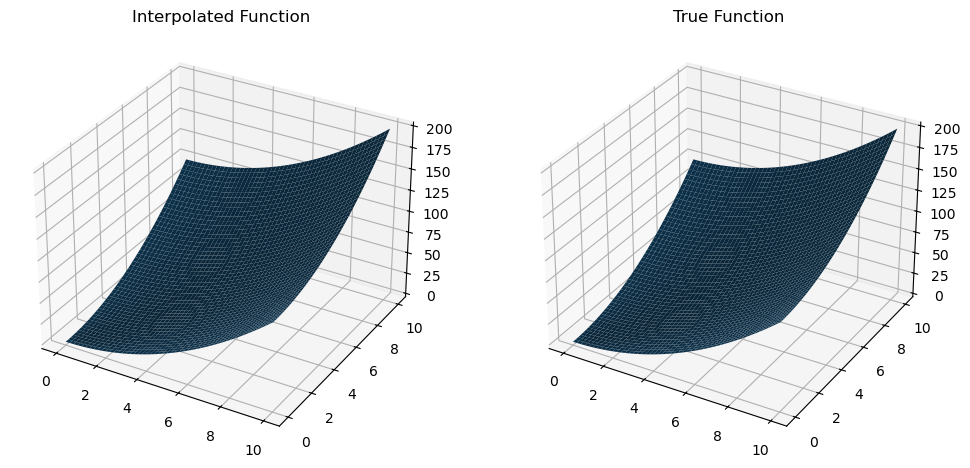

In [10]:
mult_interp = MultivaluedInterp(z_mat, [x_grid, y_grid], backend="cupy")
z_mult_interp = mult_interp(x_new, y_new).get()
z_true = np.asarray([squared_coords(x_new, y_new), trig_func(x_new, y_new)])

# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Plot the interpolated function
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_mult_interp[0])
ax1.set_title("Interpolated Function")

# Plot the true function
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, z_true[0])
ax2.set_title("True Function")

plt.show()

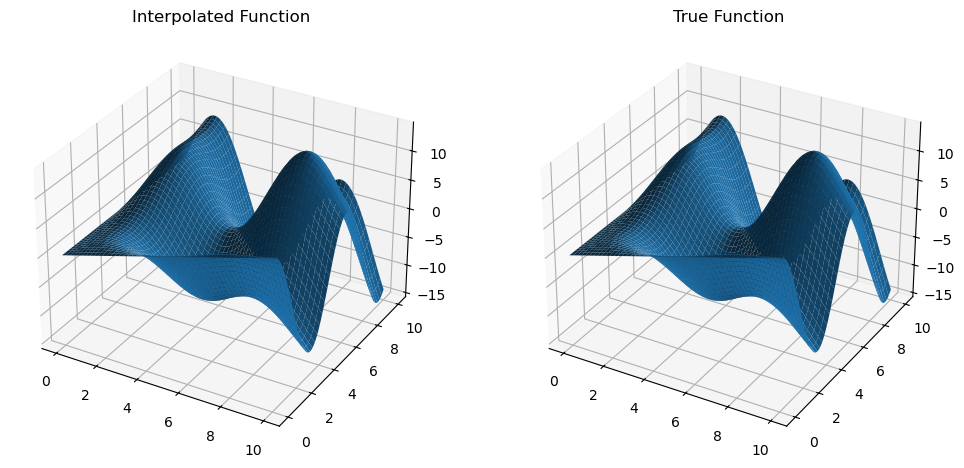

In [11]:
# Create a figure with two subplots
fig = plt.figure(figsize=(12, 6))

# Plot the interpolated function
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.plot_surface(x_new, y_new, z_mult_interp[1])
ax1.set_title("Interpolated Function")

# Plot the true function
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot_surface(x_new, y_new, z_true[1])
ax2.set_title("True Function")

plt.show()